In [300]:
import pandas as pd
import os

In [301]:
os.listdir('Data')

['sample_submission.csv', 'test.csv', 'train.csv']

In [302]:
train_df = pd.read_csv(r'Data\train.csv')
test_df = pd.read_csv(r'Data\test.csv')
sample_submission_df = pd.read_csv(r'Data\sample_submission.csv')

In [303]:
print("Train Shape")
print(train_df.shape)
print("Train Shape")
print(test_df.shape)

Train Shape
(8523, 12)
Train Shape
(5681, 11)


In [304]:
sample_submission_df.head(2).T

,0,1
Item_Identifier,FDW58,FDW14
Outlet_Identifier,OUT049,OUT017
Item_Outlet_Sales,1000,1000


In [305]:
train_df.head(2).T

,0,1
Item_Identifier,FDA15,DRC01
Item_Weight,9.3,5.92
Item_Fat_Content,Low Fat,Regular
Item_Visibility,0.016047,0.019278
Item_Type,Dairy,Soft Drinks
Item_MRP,249.8092,48.2692
Outlet_Identifier,OUT049,OUT018
Outlet_Establishment_Year,1999,2009
Outlet_Size,Medium,Medium
Outlet_Location_Type,Tier 1,Tier 3


In [306]:
test_df.head(2).T

,0,1
Item_Identifier,FDW58,FDW14
Item_Weight,20.75,8.3
Item_Fat_Content,Low Fat,reg
Item_Visibility,0.007565,0.038428
Item_Type,Snack Foods,Dairy
Item_MRP,107.8622,87.3198
Outlet_Identifier,OUT049,OUT017
Outlet_Establishment_Year,1999,2007
Outlet_Size,Medium,NaN
Outlet_Location_Type,Tier 1,Tier 2


In [307]:
## EDA

In [308]:
train_df.dtypes.to_frame()

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [309]:
### Unitvariate 

In [310]:
### train

In [311]:
train_df.Item_Identifier.nunique()

1559

In [312]:
print(train_df.Item_Type.unique())
print(train_df.Item_Type.value_counts())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


In [313]:
print(train_df.Outlet_Identifier.unique())
print(train_df.Outlet_Identifier.value_counts())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64


In [314]:
##Outlet related variables

In [315]:
print(train_df.Outlet_Establishment_Year.unique())
print(train_df.Outlet_Establishment_Year.value_counts())


[1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64


In [316]:
print(train_df.Outlet_Size.unique())
print(train_df.Outlet_Size.value_counts())

['Medium' nan 'High' 'Small']
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64


In [317]:
print(train_df.Outlet_Type.unique())
print(train_df.Outlet_Type.value_counts())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64


In [318]:
print(train_df.Outlet_Location_Type.unique())
print(train_df.Outlet_Location_Type.value_counts())

['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


In [319]:
print(train_df.Item_Fat_Content.unique())
print(train_df.Item_Fat_Content.value_counts())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


In [320]:
## check for nulls and blanks

In [322]:
train_df.isna().sum().to_frame("nulls").join((train_df.eq('').sum()).to_frame("blanks"))

,nulls,blanks
Item_Identifier,0,0
Item_Weight,1463,0
Item_Fat_Content,0,0
Item_Visibility,0,0
Item_Type,0,0
Item_MRP,0,0
Outlet_Identifier,0,0
Outlet_Establishment_Year,0,0
Outlet_Size,2410,0
Outlet_Location_Type,0,0


In [323]:
test_df.isna().sum().to_frame("nulls").join((test_df.eq('').sum()).to_frame("blanks"))

,nulls,blanks
Item_Identifier,0,0
Item_Weight,976,0
Item_Fat_Content,0,0
Item_Visibility,0,0
Item_Type,0,0
Item_MRP,0,0
Outlet_Identifier,0,0
Outlet_Establishment_Year,0,0
Outlet_Size,1606,0
Outlet_Location_Type,0,0


In [324]:
def num_to_cat(series):
    var_name = series.name
    labels = [f"Low_{var_name}", f"Medium_{var_name}", f"High_{var_name}"]
    return pd.qcut(series, q=3, labels=labels)

num_vars = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

for var in num_vars:
    train_df[var+"_cat"] =  num_to_cat(train_df[var])
train_df['Outlet_Establishment_Year_cat'] = train_df['Outlet_Establishment_Year'].astype(str)

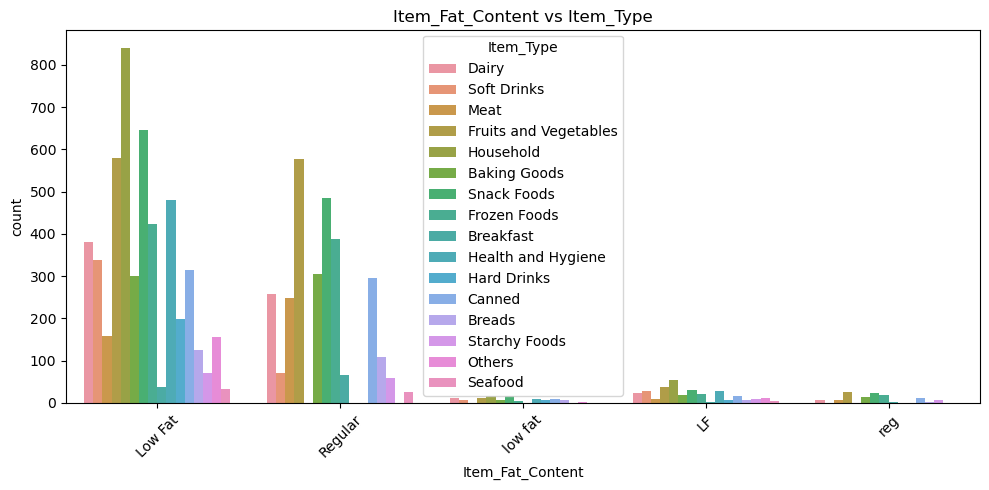

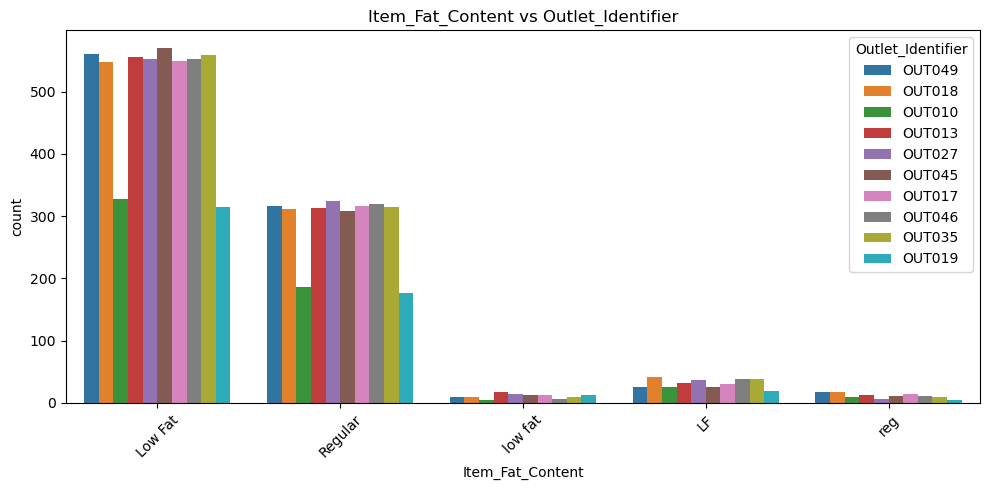

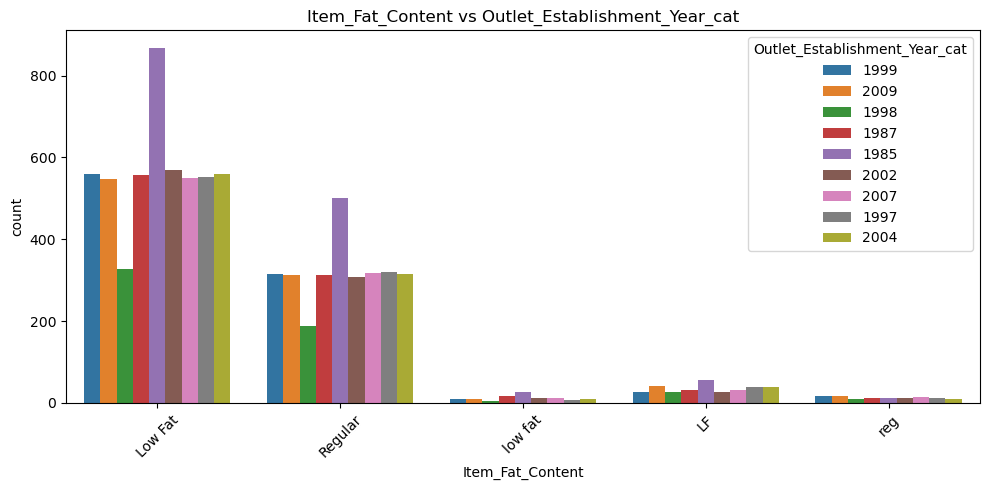

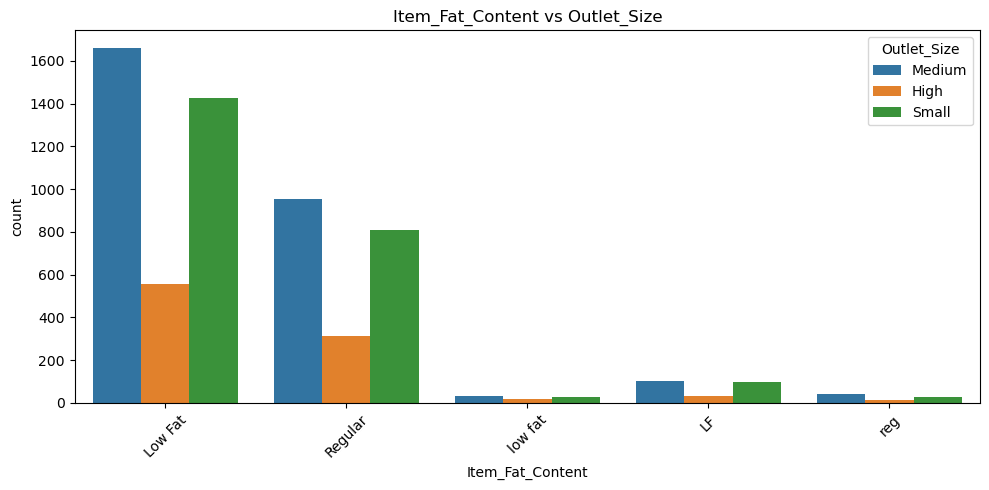

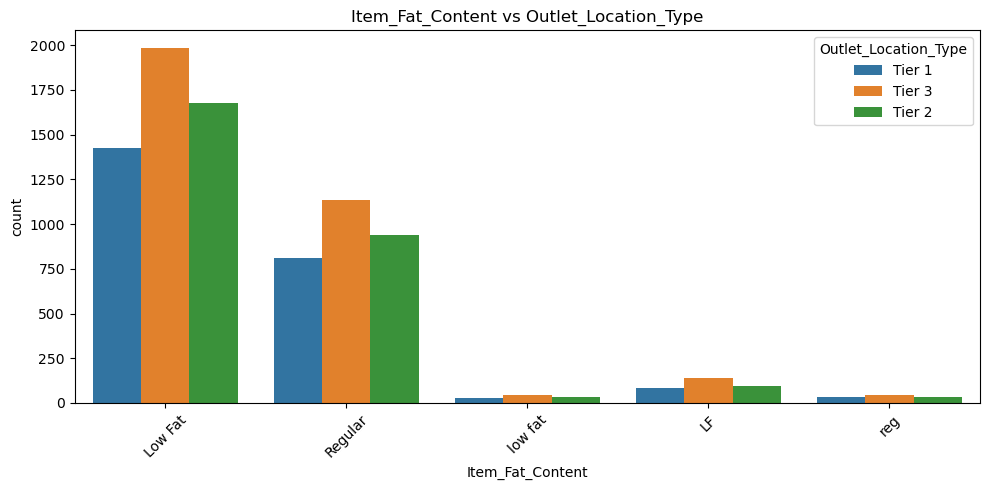

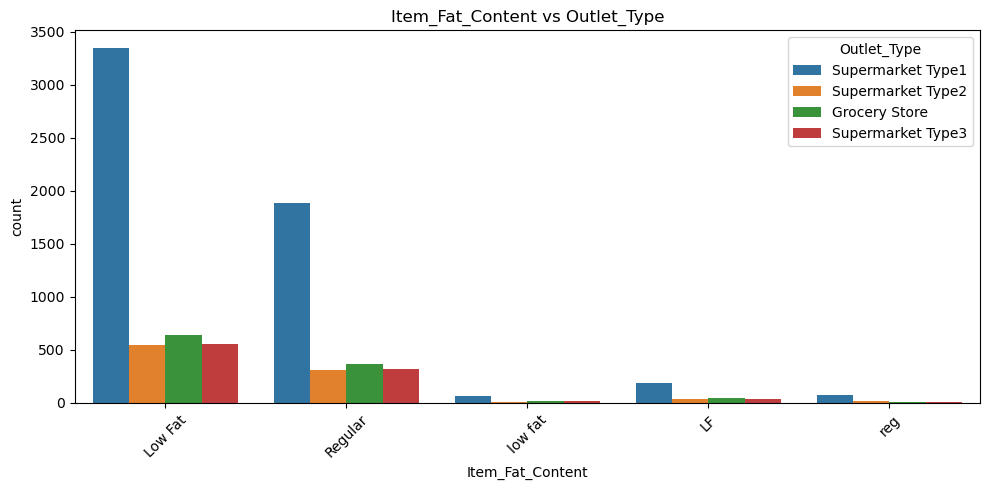

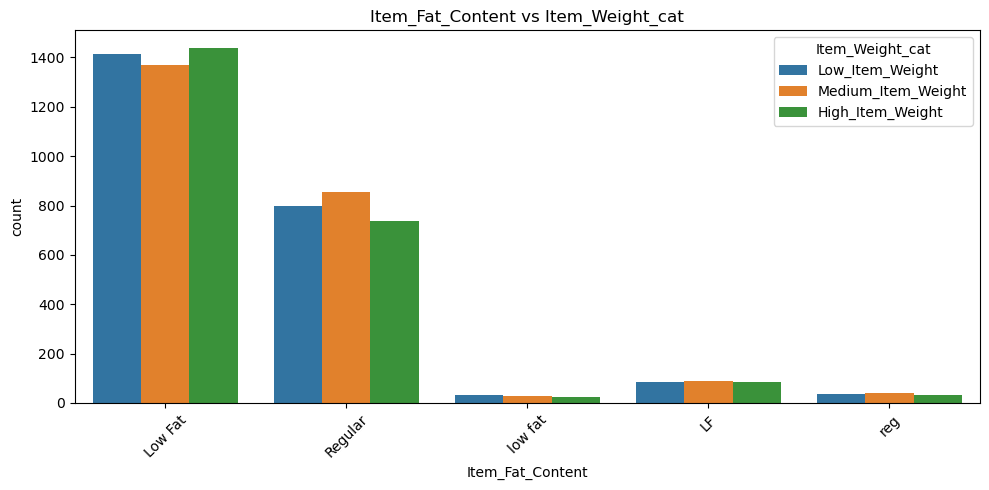

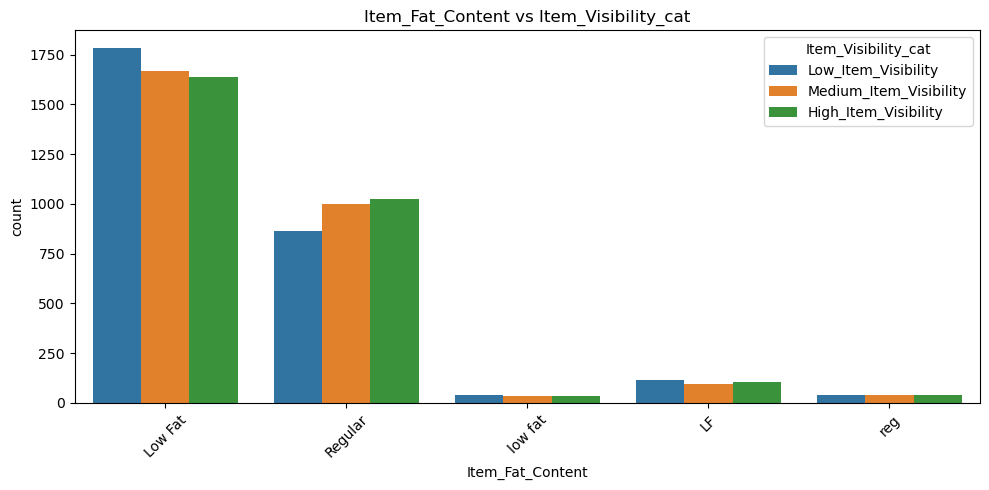

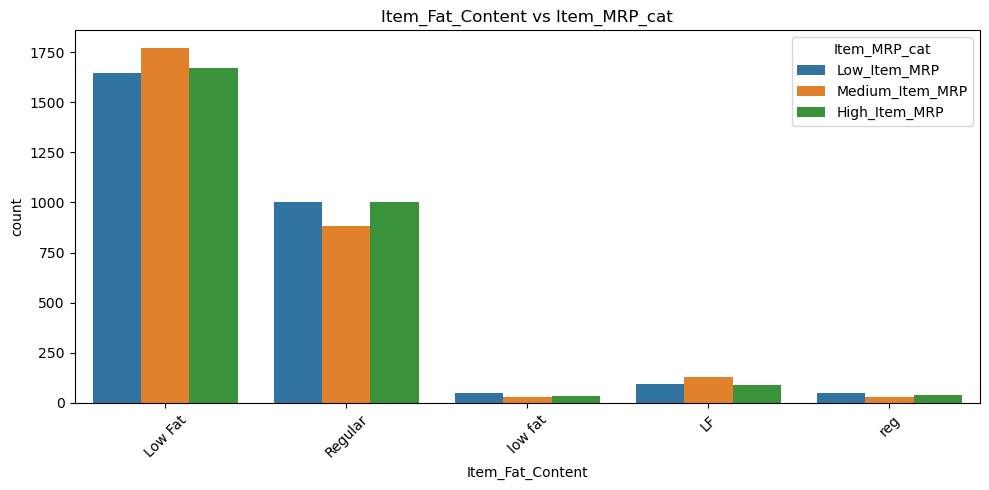

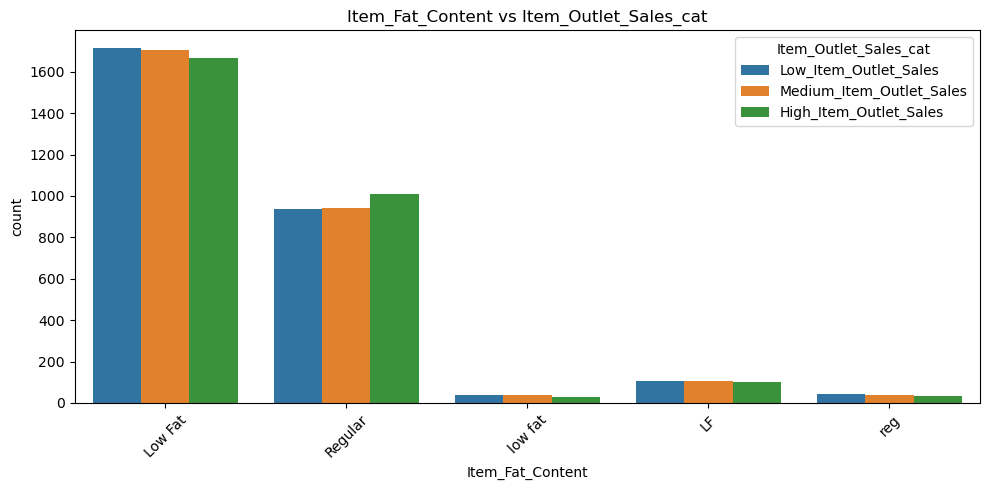

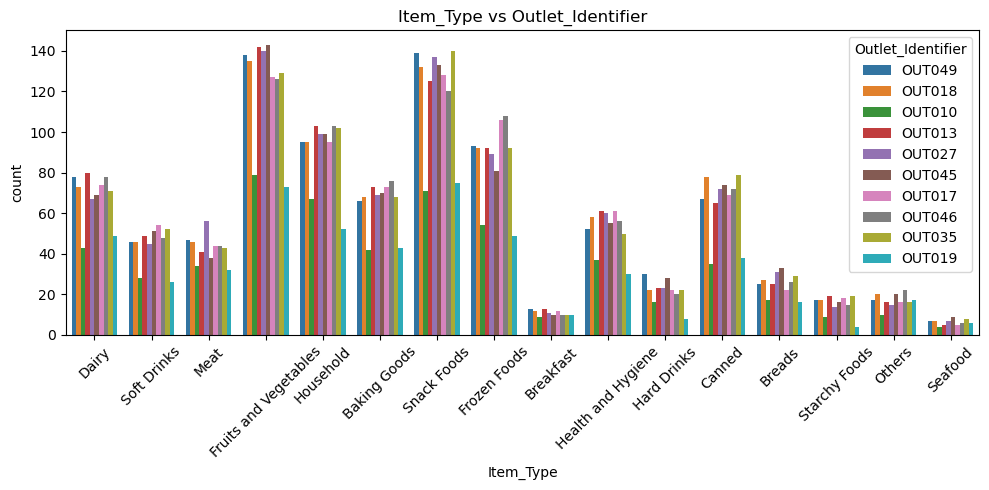

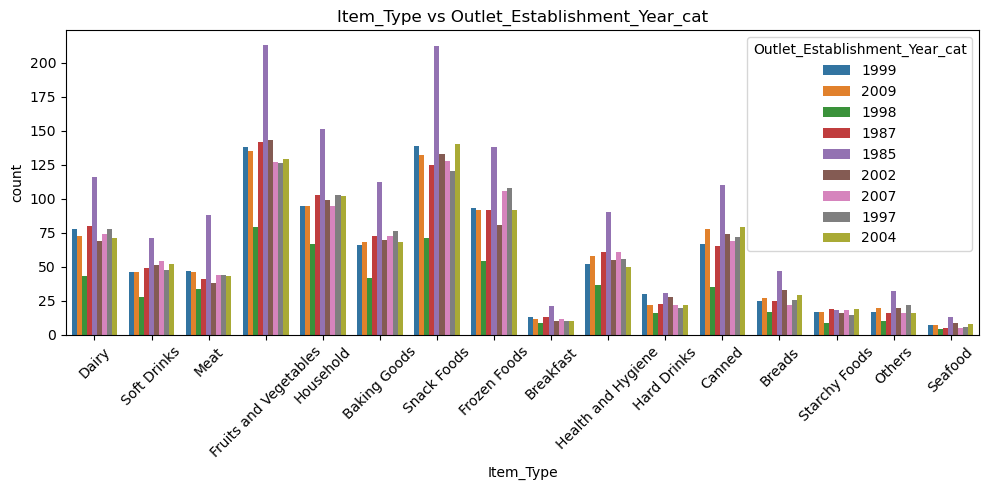

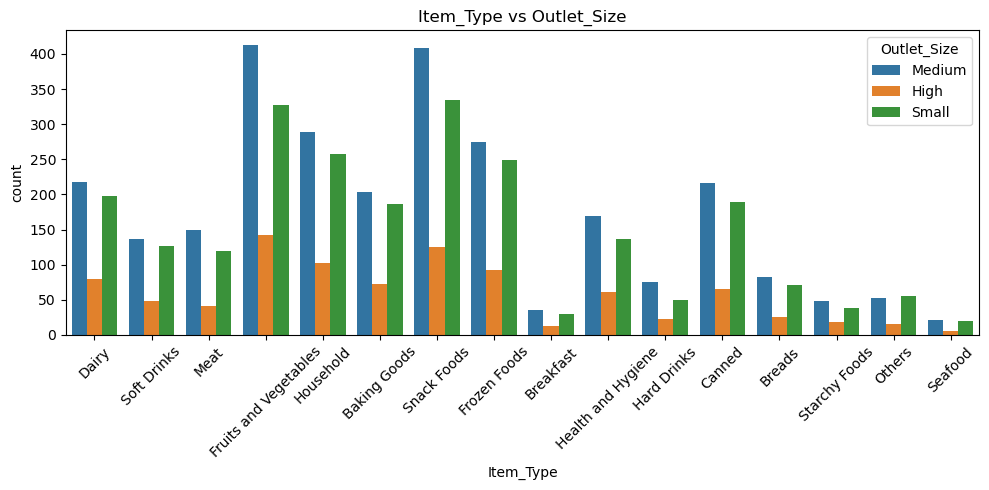

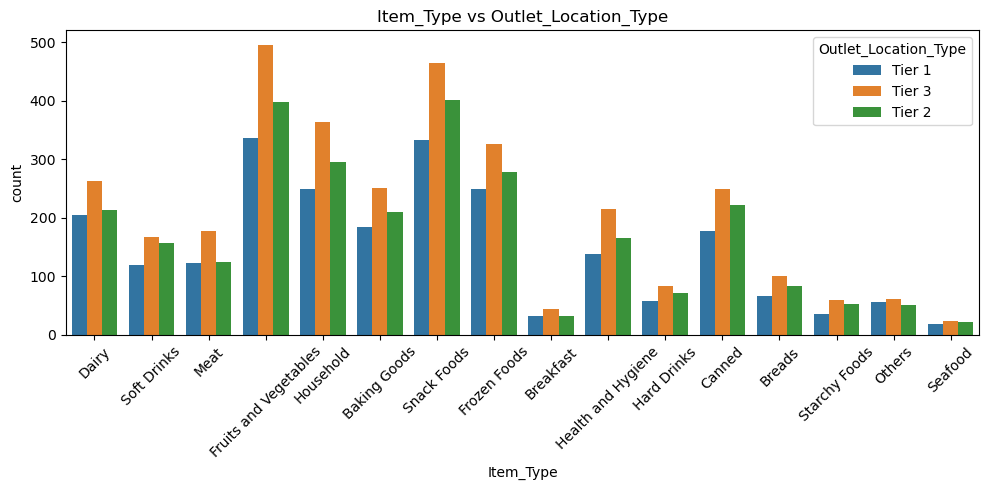

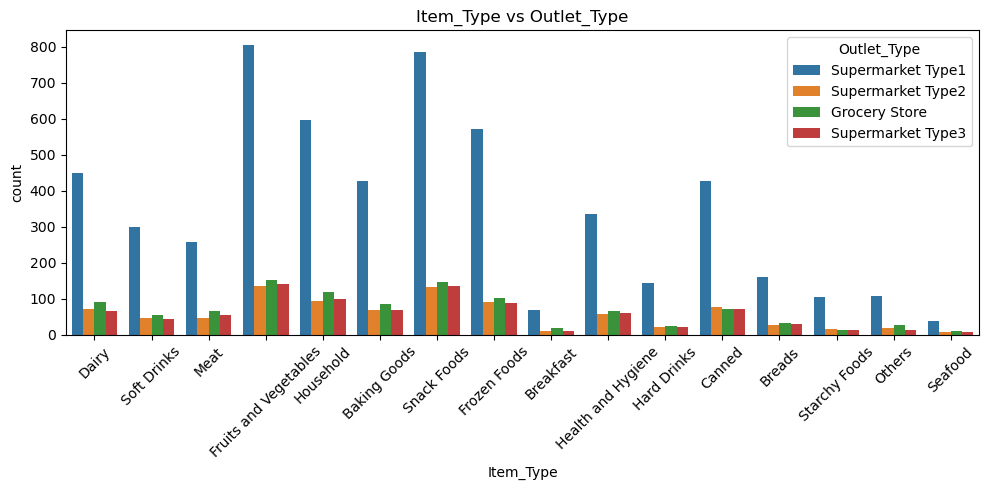

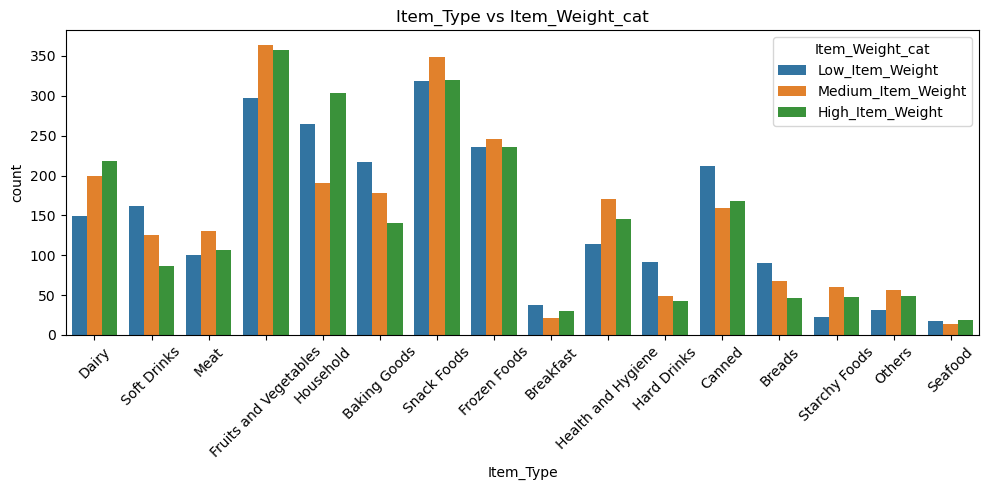

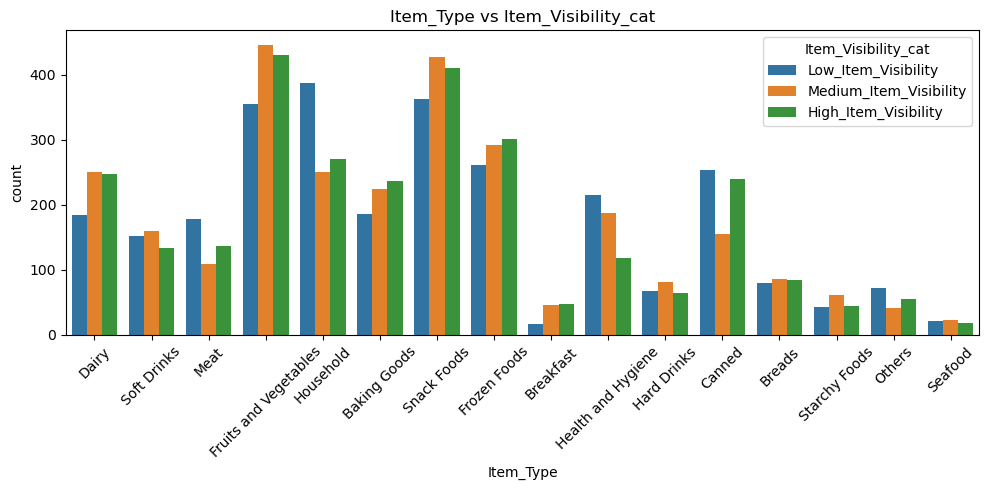

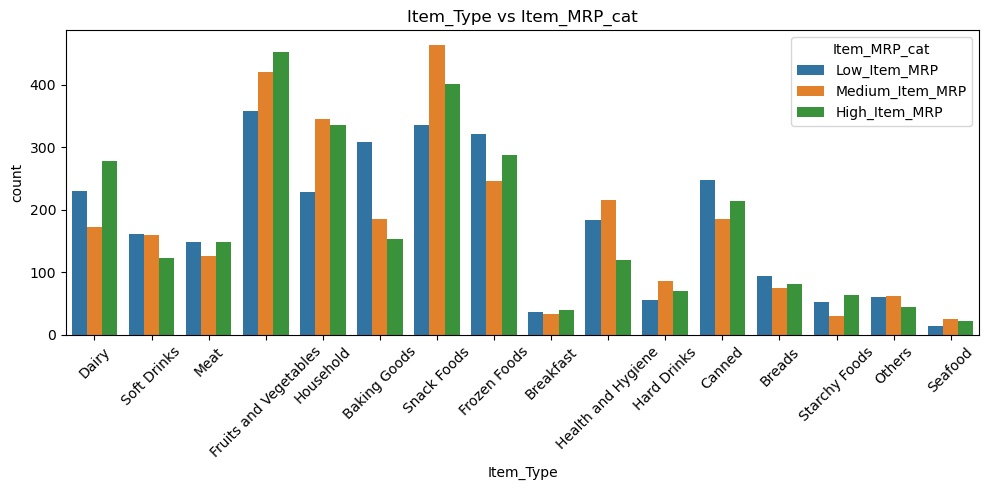

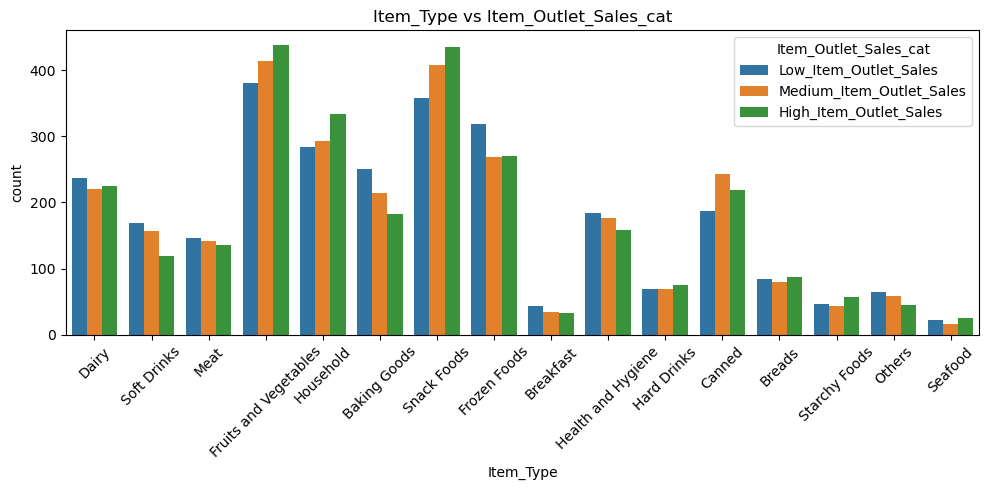

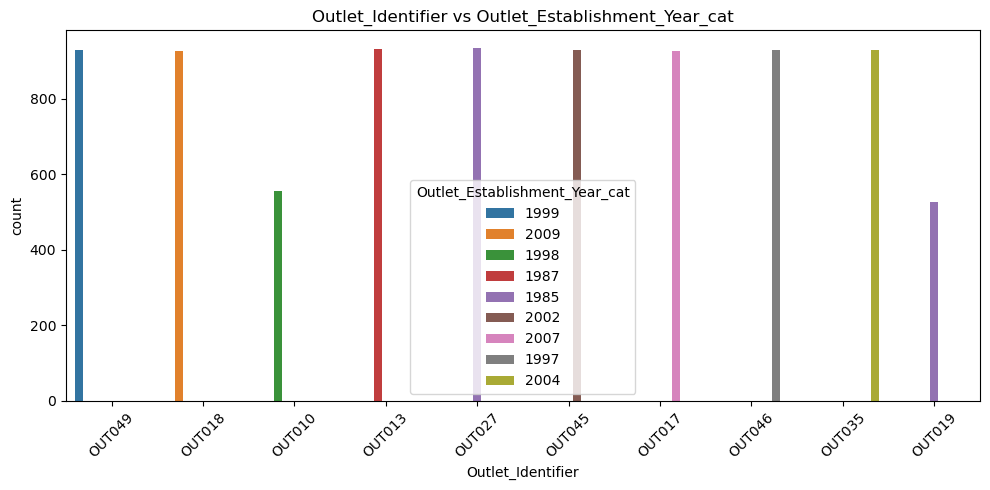

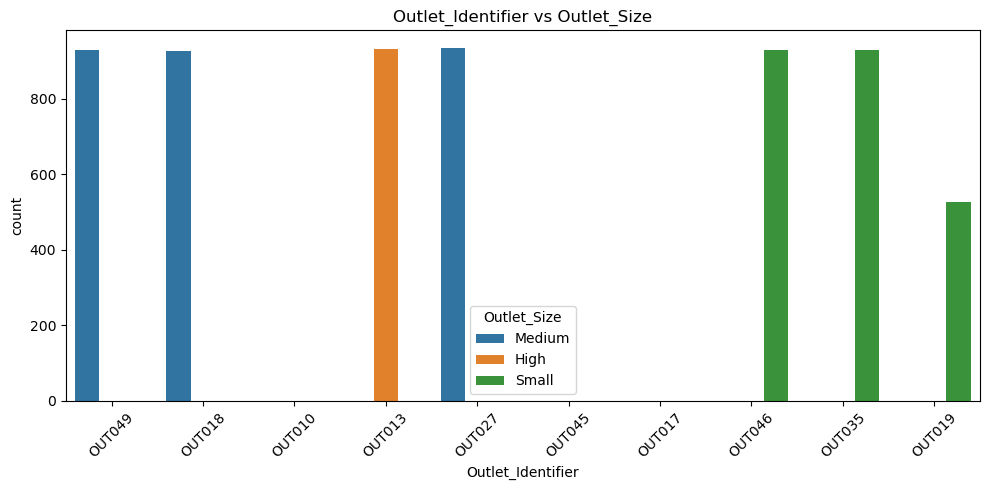

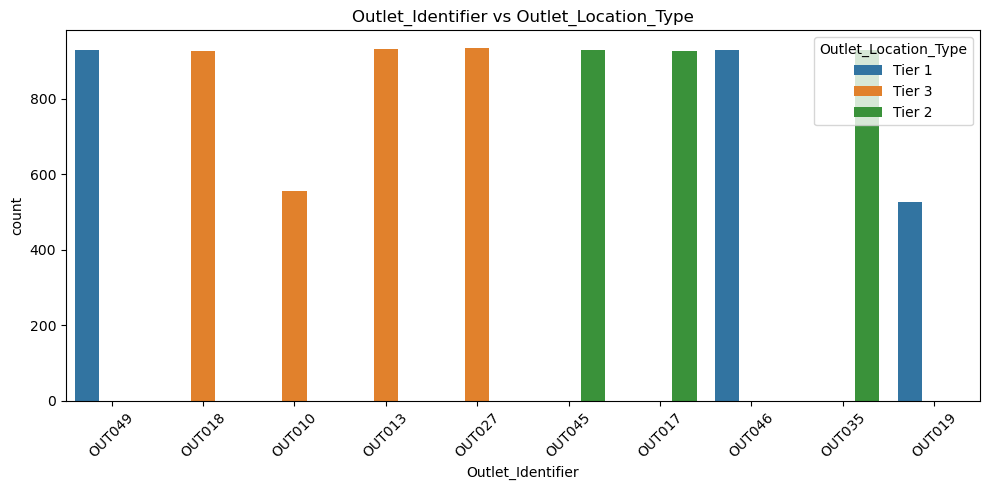

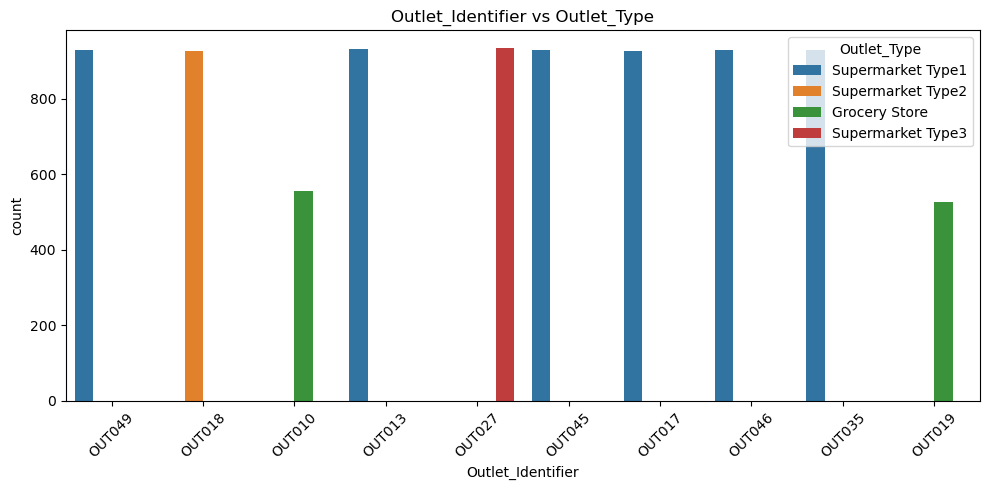

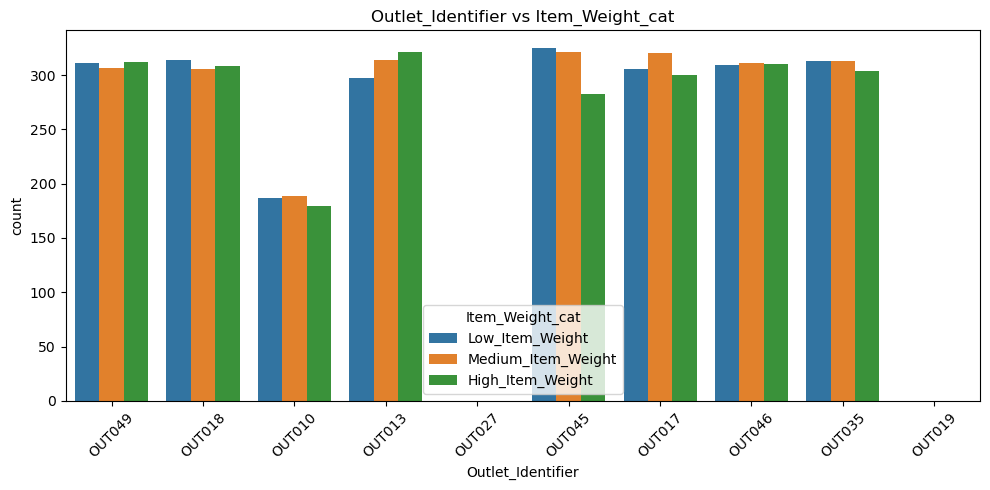

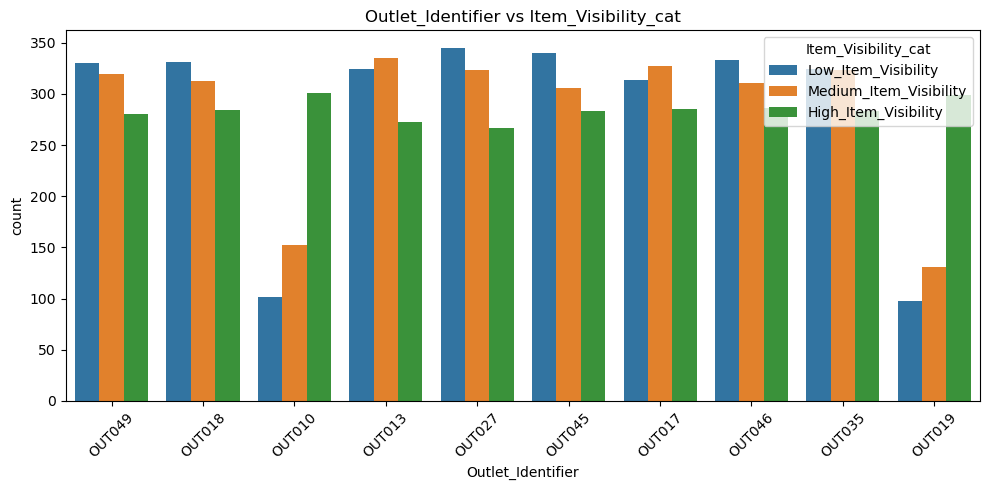

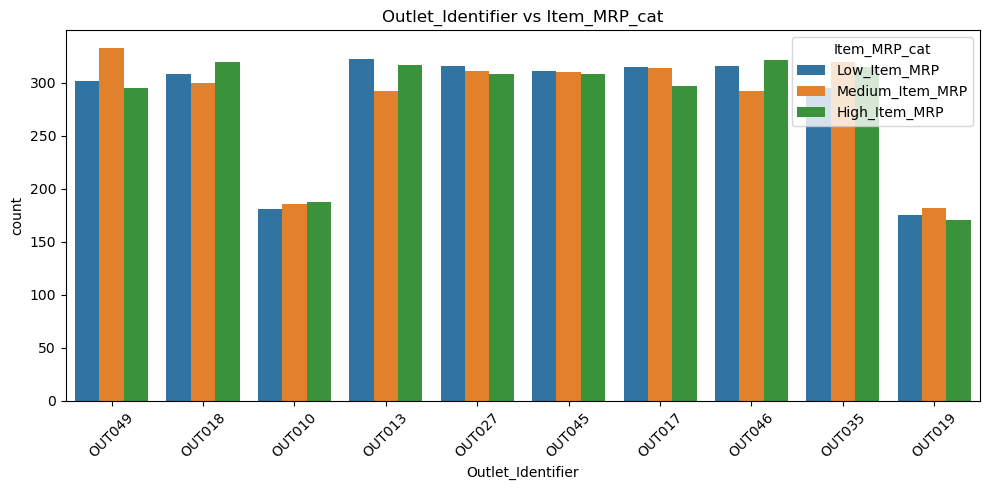

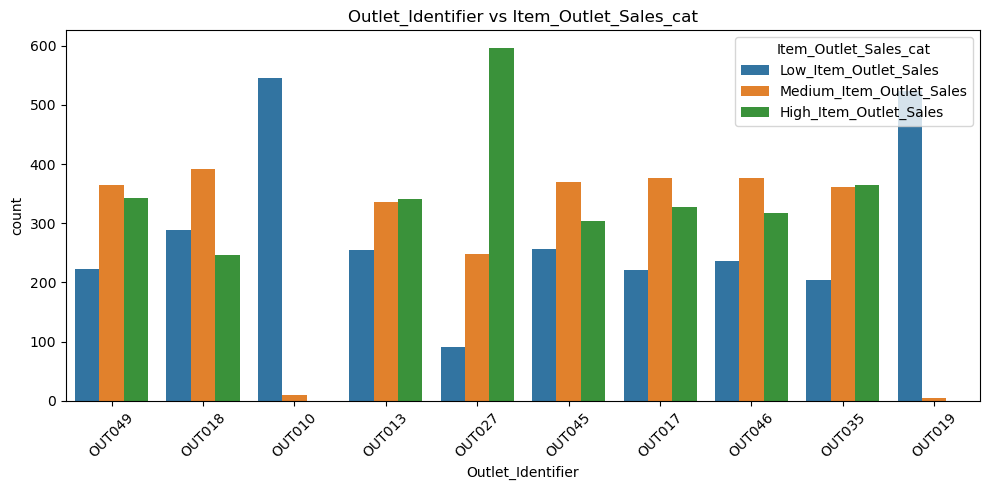

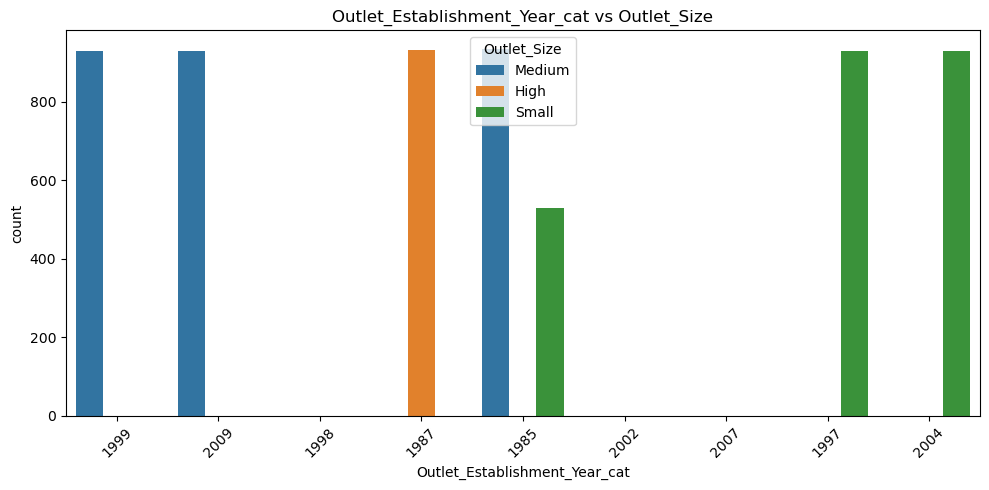

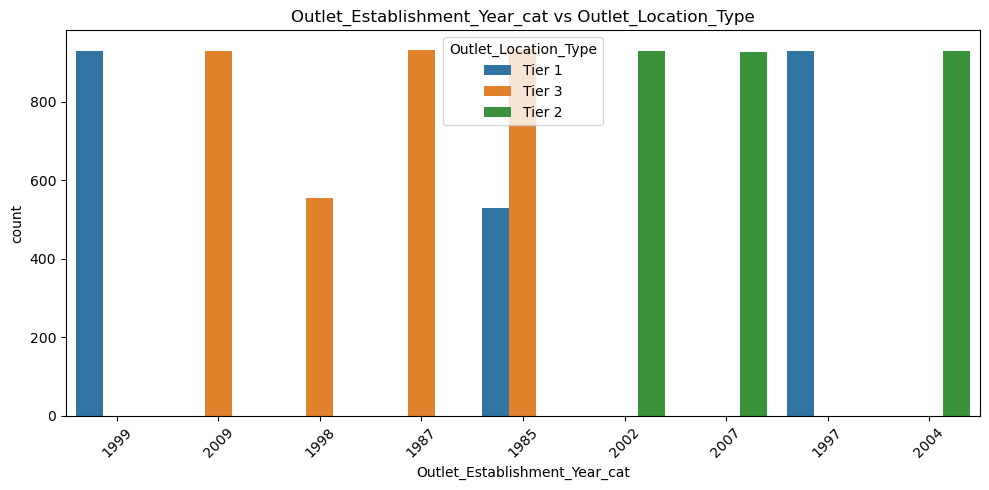

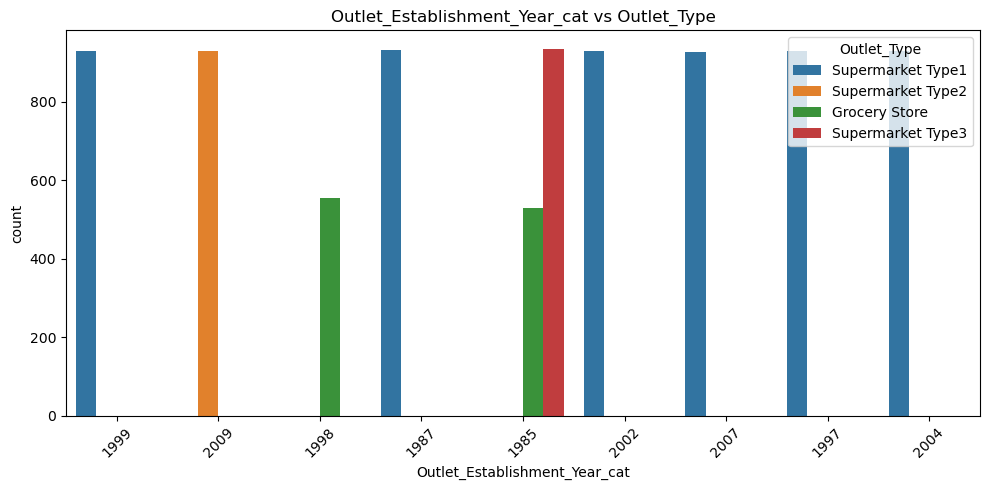

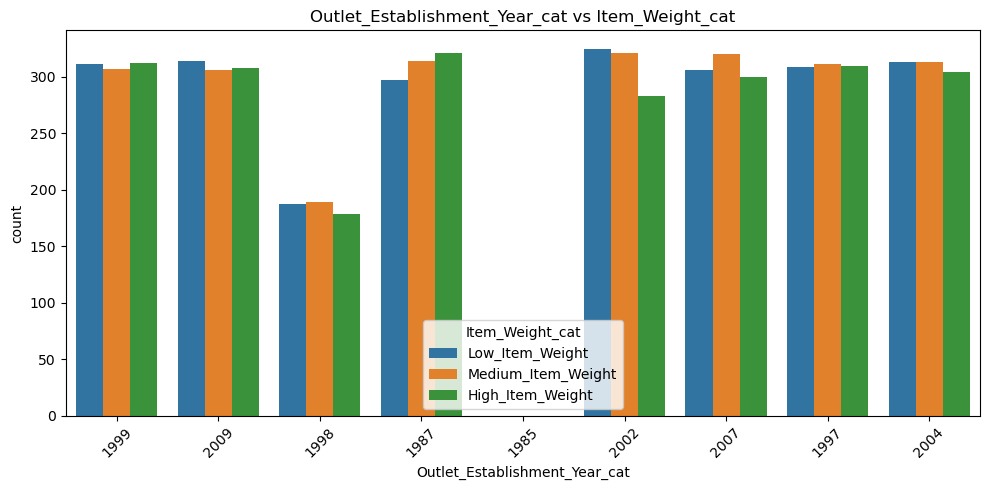

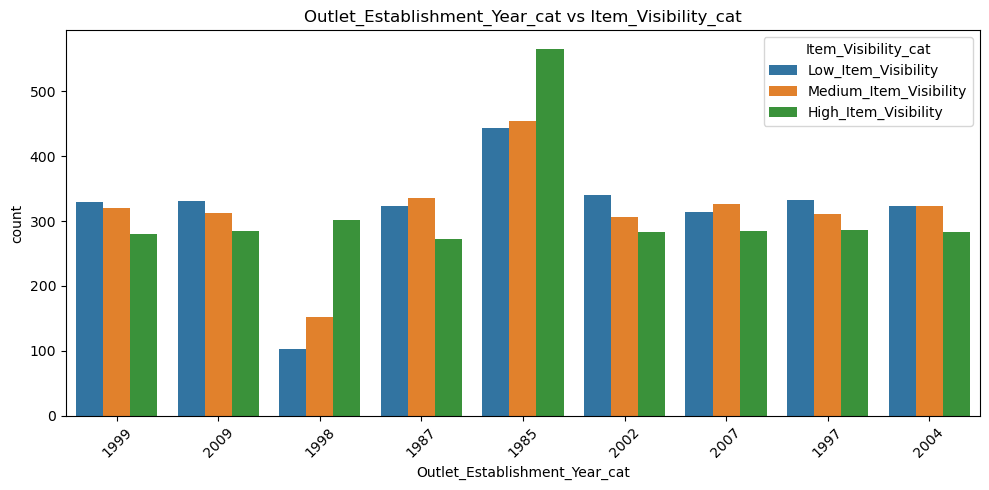

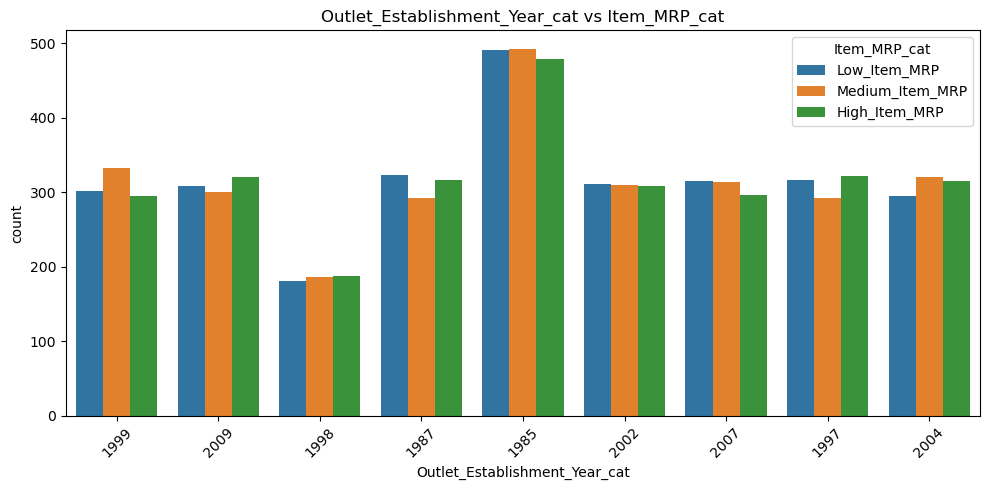

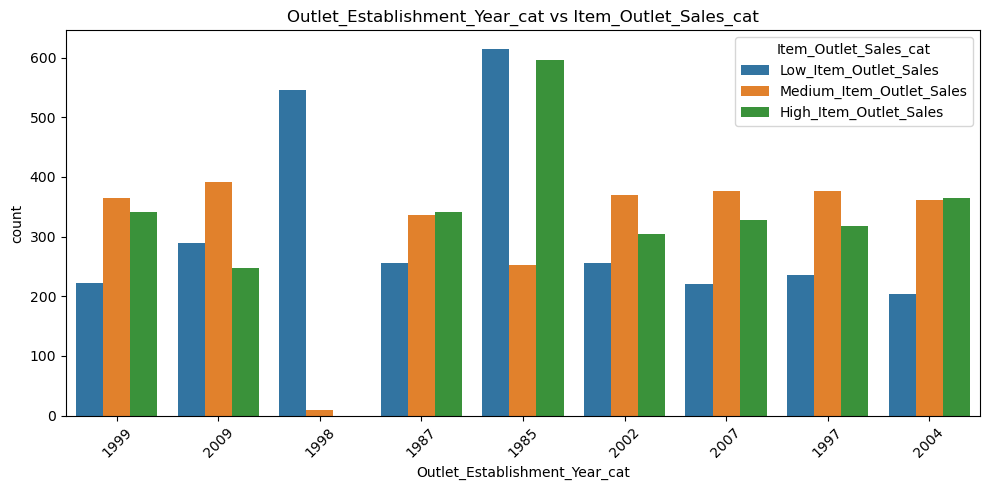

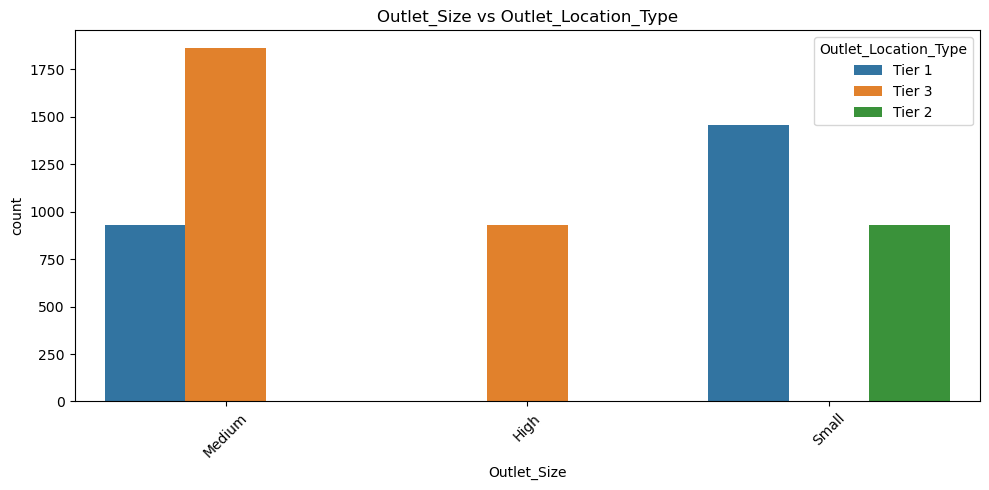

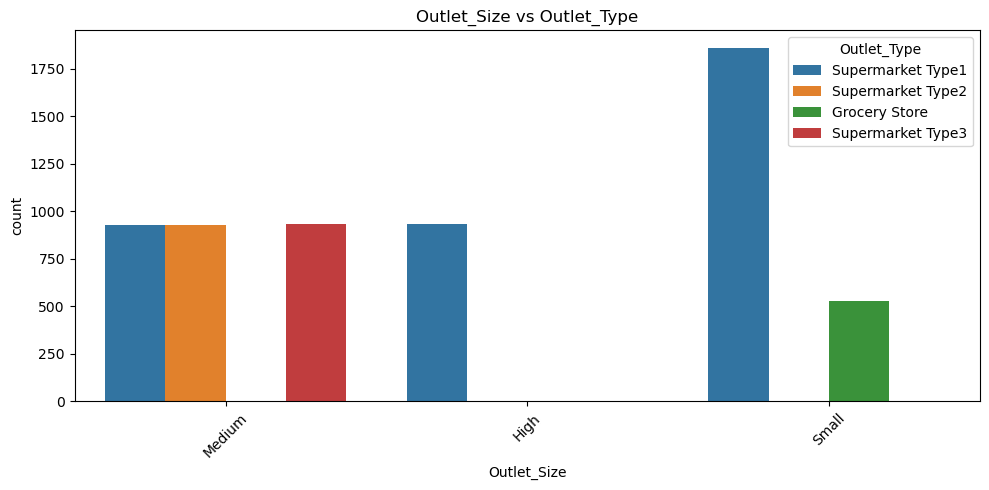

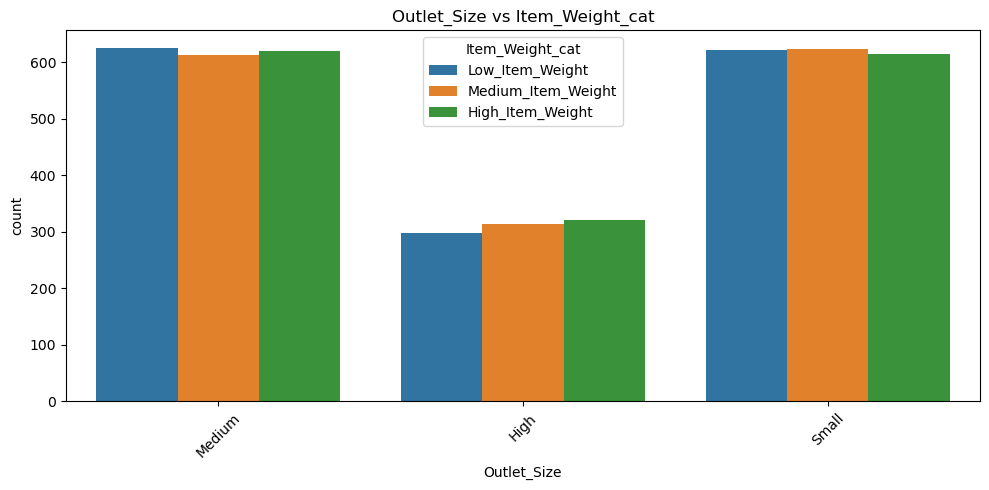

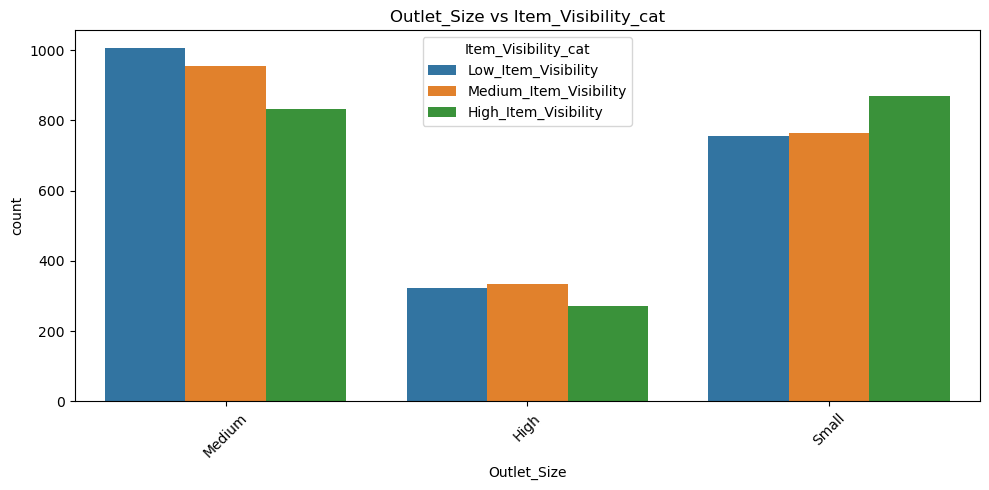

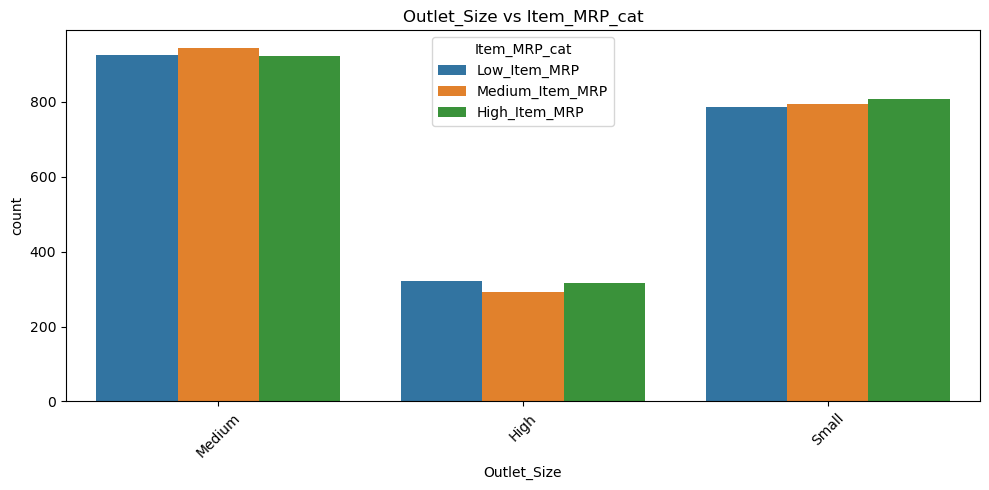

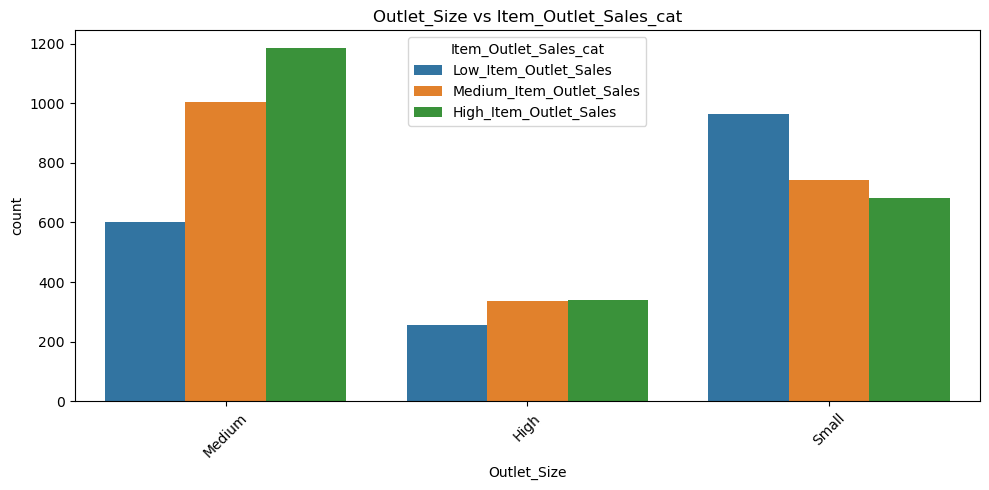

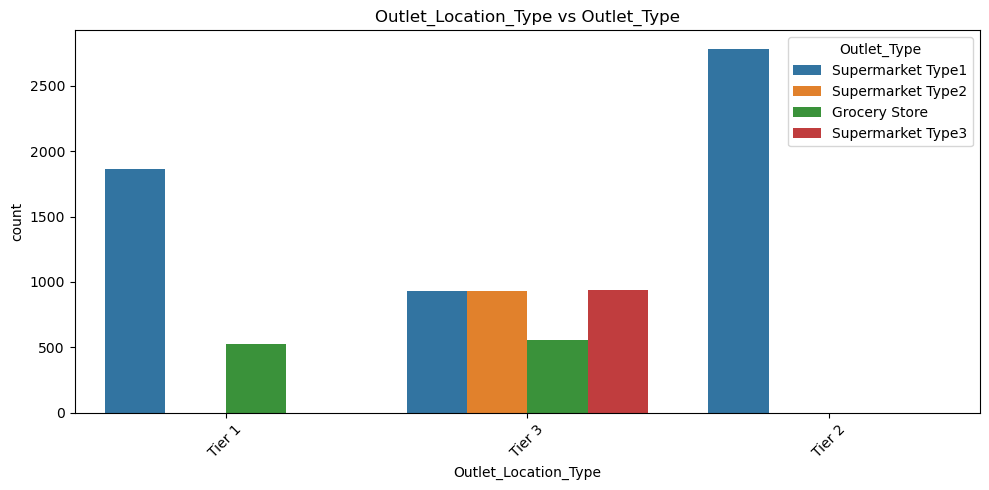

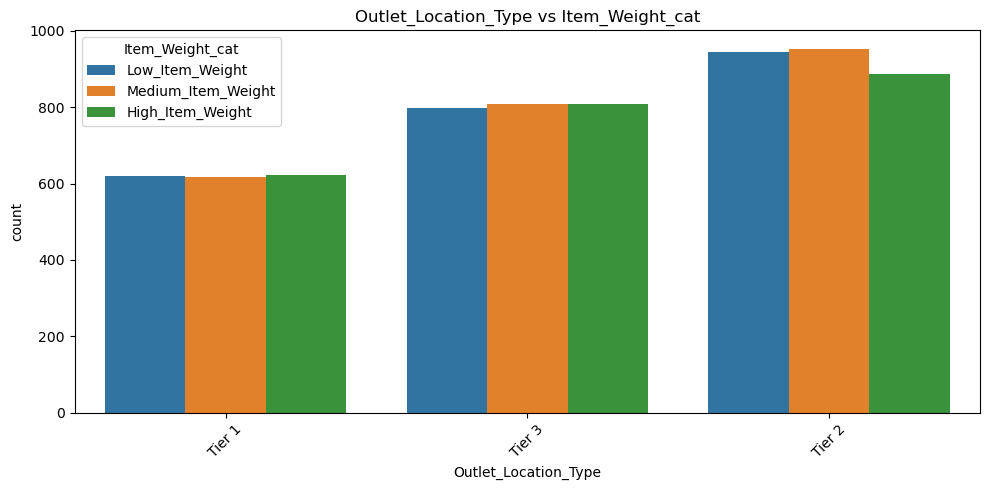

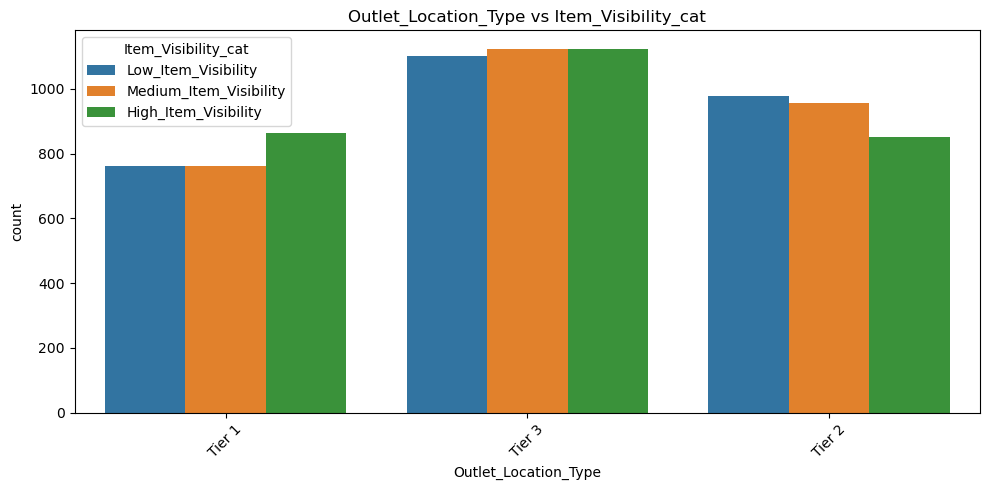

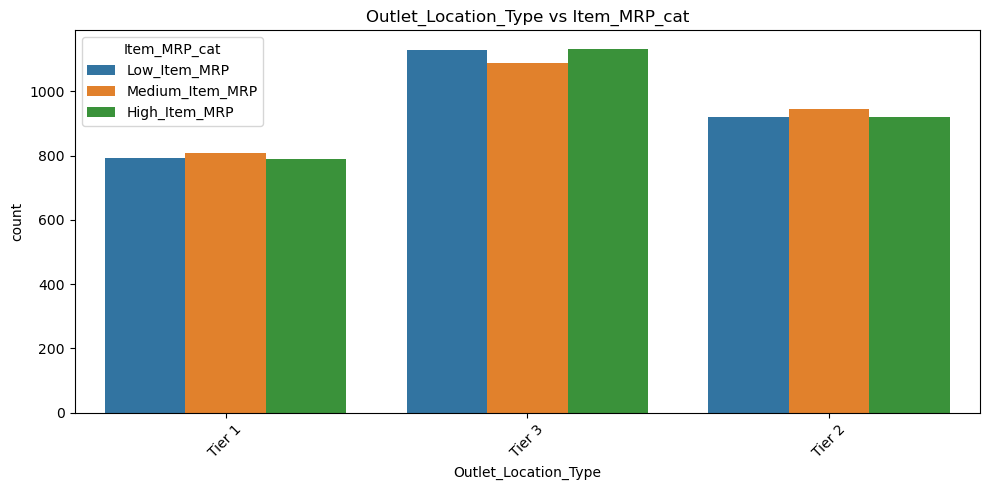

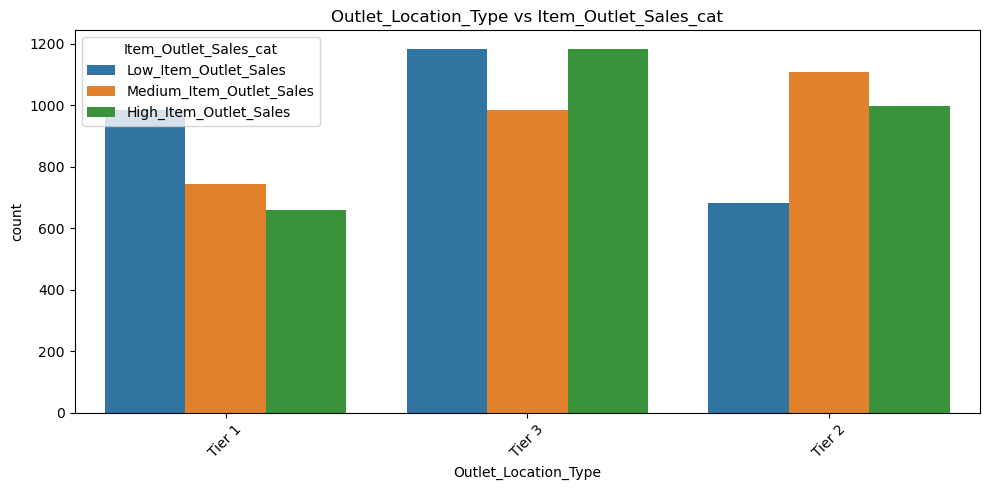

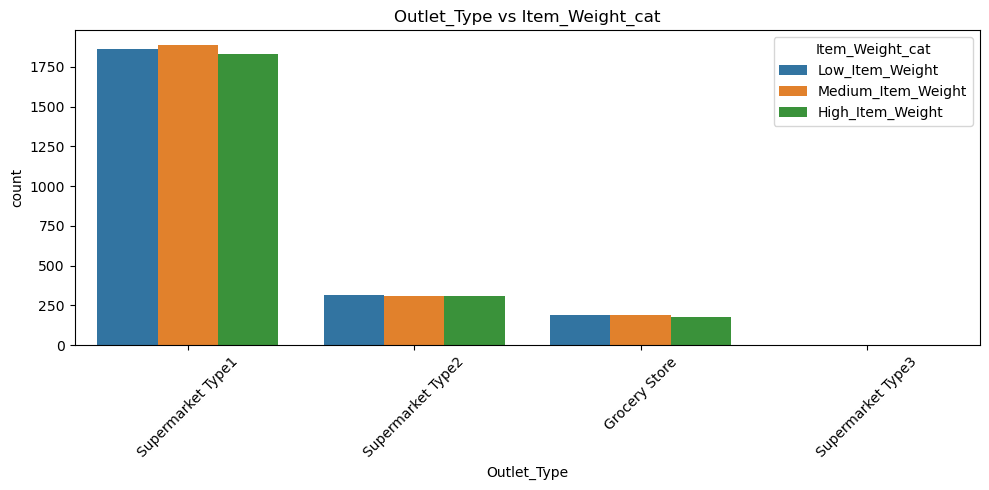

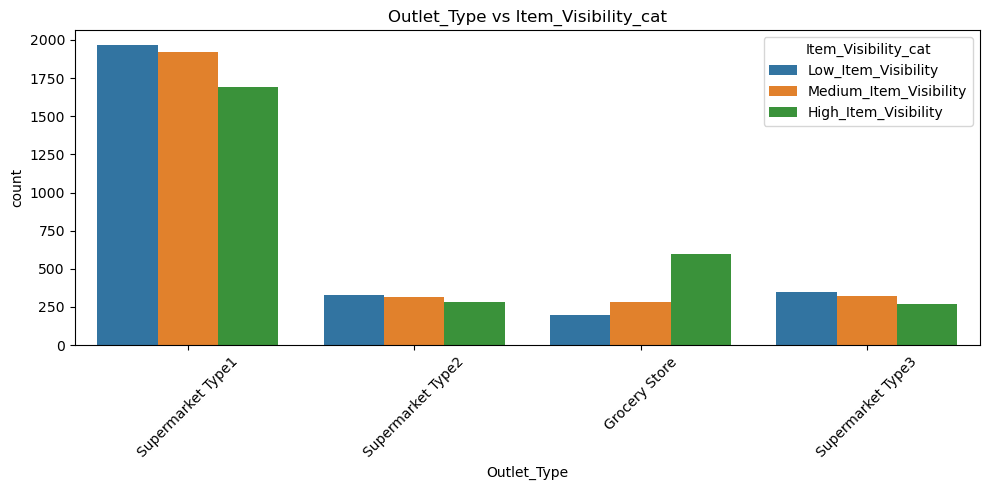

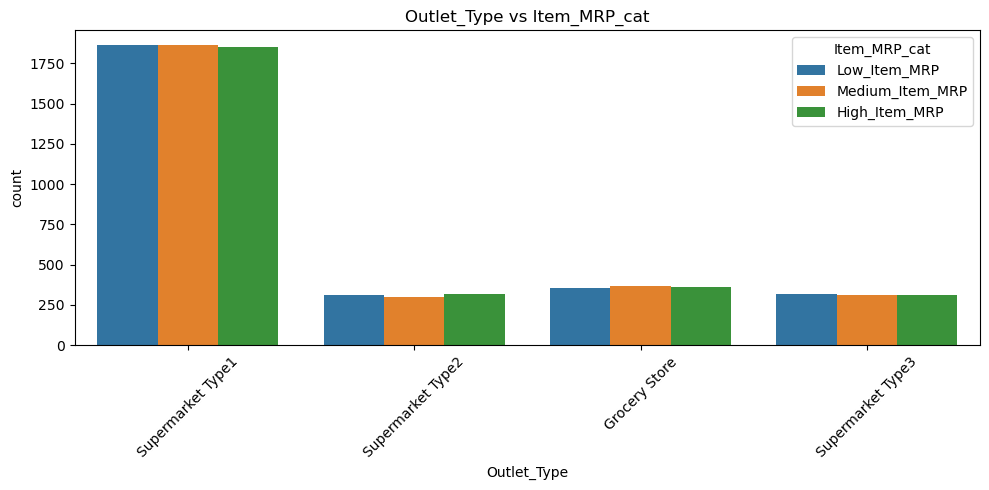

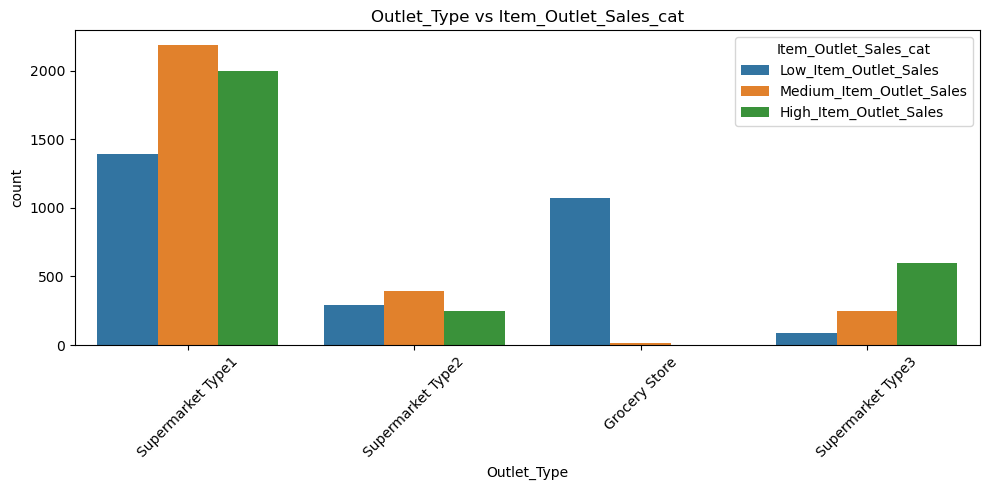

C:\Users\Alinp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


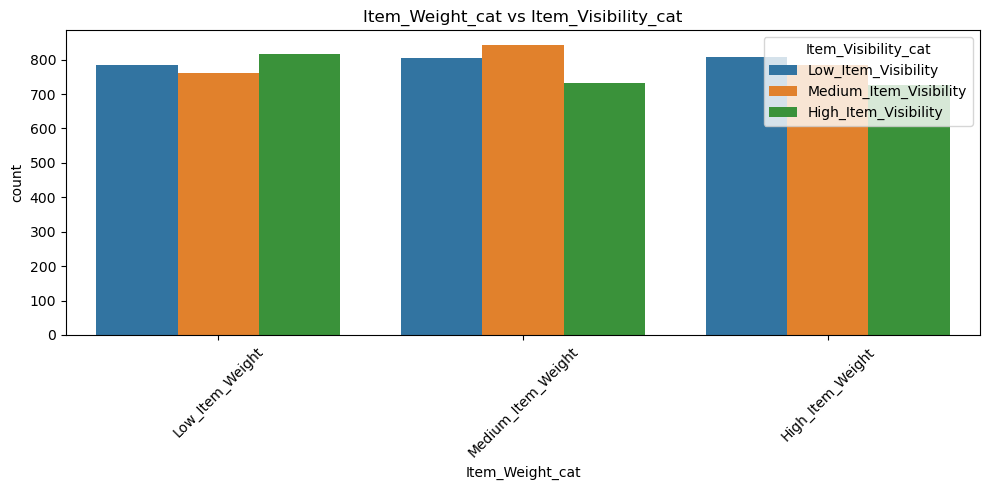

C:\Users\Alinp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


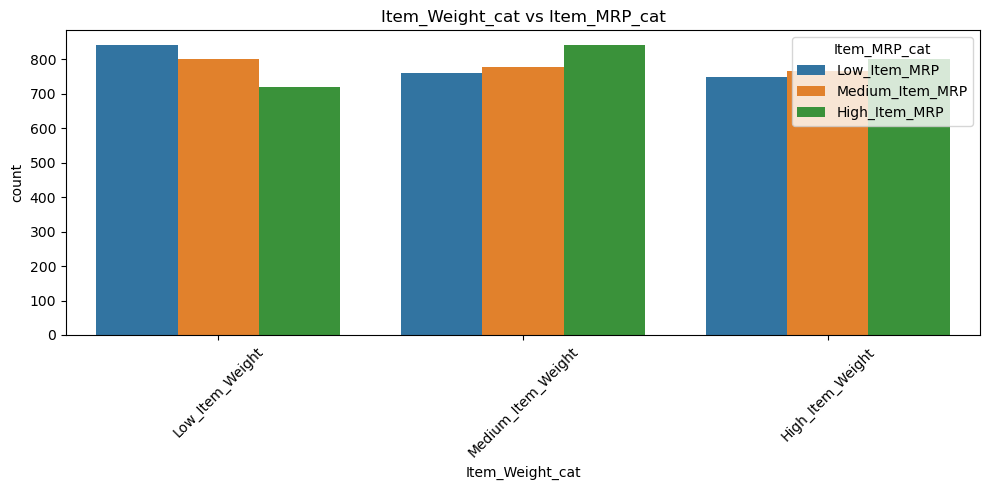

C:\Users\Alinp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


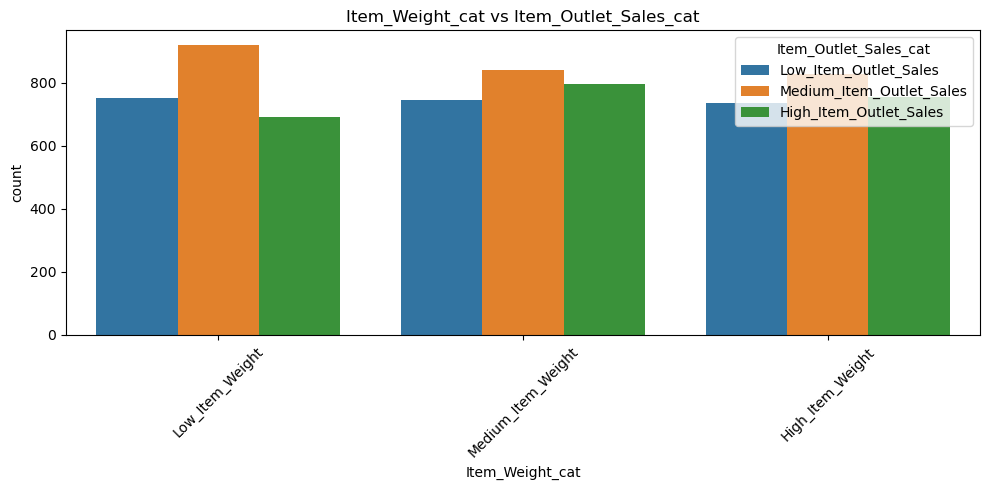

C:\Users\Alinp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


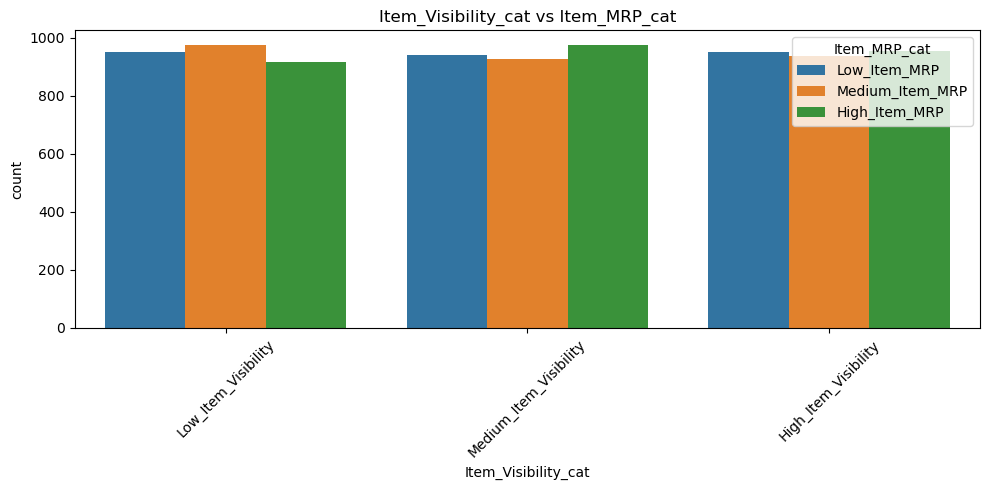

C:\Users\Alinp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


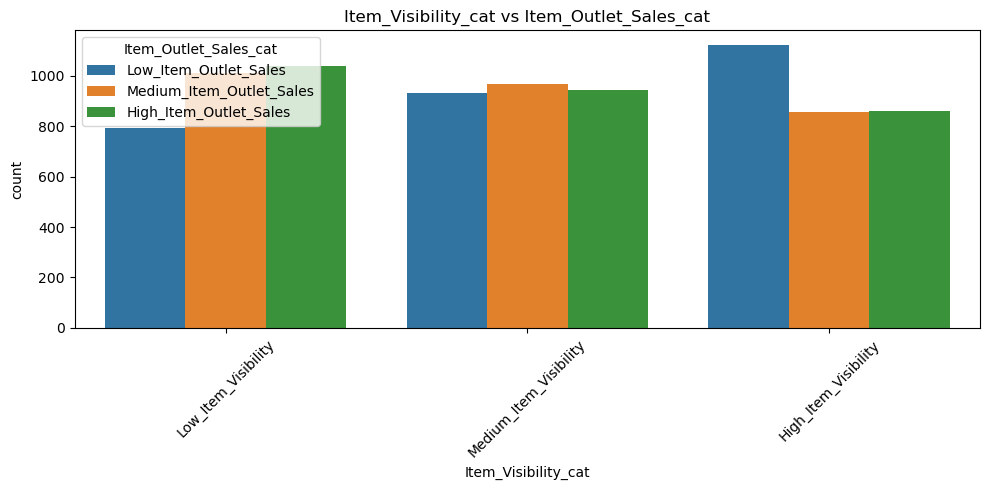

C:\Users\Alinp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


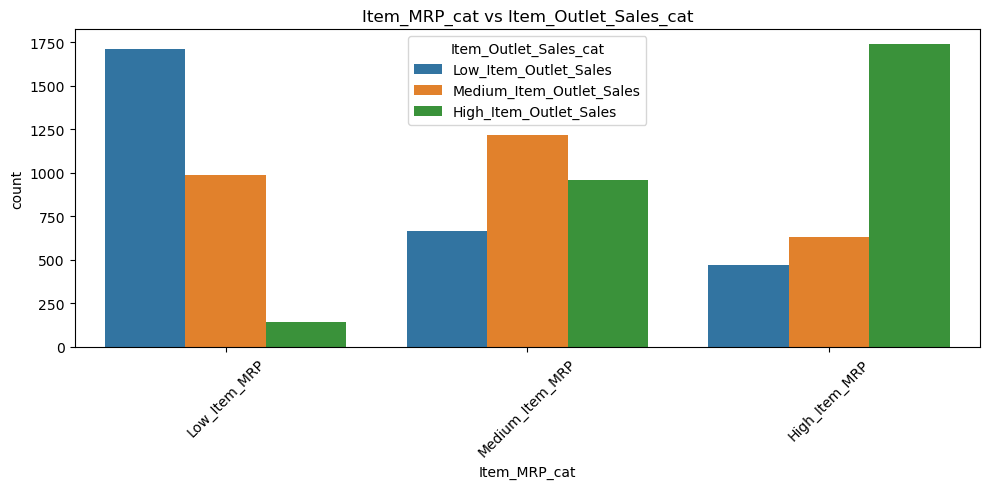

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

cat_vars = [ 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
            'Outlet_Establishment_Year_cat', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Item_Weight_cat',
       'Item_Visibility_cat', 'Item_MRP_cat', 'Item_Outlet_Sales_cat']

# Pairwise countplots for categorical vs categorical variables
for var1, var2 in combinations(cat_vars, 2):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_df, x=var1, hue=var2)
    plt.title(f'{var1} vs {var2}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [326]:
####obs
## Low Fat, low fat, LF can be combined to low Fat
## outlet OUT010, OUT19 
### most outlets are from supermarket type1 and most sales also come form supermarket type1

In [327]:

train_df = pd.read_csv(r'Data\train.csv')
test_df = pd.read_csv(r'Data\test.csv')
sample_submission_df = pd.read_csv(r'Data\sample_submission.csv')

In [328]:
## Missing value handelling

In [329]:
train_df['Outlet_Size_temp']=train_df['Outlet_Size'].fillna('temp')
test_df['Outlet_Size_temp']=test_df['Outlet_Size'].fillna('temp')

In [330]:
test_df[['Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Location_Type','Outlet_Type','Outlet_Size_temp']].value_counts()

Outlet_Identifier  Outlet_Establishment_Year  Outlet_Location_Type  Outlet_Type        Outlet_Size_temp
OUT027             1985                       Tier 3                Supermarket Type3  Medium              624
OUT013             1987                       Tier 3                Supermarket Type1  High                621
OUT035             2004                       Tier 2                Supermarket Type1  Small               620
OUT046             1997                       Tier 1                Supermarket Type1  Small               620
OUT049             1999                       Tier 1                Supermarket Type1  Medium              620
OUT045             2002                       Tier 2                Supermarket Type1  temp                619
OUT018             2009                       Tier 3                Supermarket Type2  Medium              618
OUT017             2007                       Tier 2                Supermarket Type1  temp                617
OUT010  

In [331]:
train_df[['Outlet_Type','Outlet_Location_Type','Outlet_Size']].value_counts().sort_index()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          528
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                   Tier 3                High           932
Supermarket Type2  Tier 3                Medium         928
Supermarket Type3  Tier 3                Medium         935
Name: count, dtype: int64

In [332]:
## replacing na with median and mode

In [333]:
train_df['Outlet_Size'].fillna('Small',inplace=True)
test_df['Outlet_Size'].fillna('Small',inplace=True)

In [334]:
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df.groupby('Item_Identifier')['Item_Weight'].transform('median'))
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df.groupby('Item_Fat_Content')['Item_Weight'].transform('median'))


test_df['Item_Weight'] = test_df['Item_Weight'].fillna(train_df.groupby('Item_Identifier')['Item_Weight'].transform('median'))
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(train_df.groupby('Item_Fat_Content')['Item_Weight'].transform('median'))


In [335]:
## feature enginnering 
## covneting numeric to cateogrical variables

In [336]:
# Create 'Outlet_Age' feature from year
train_df['Outlet_Age'] = 2025 - train_df['Outlet_Establishment_Year']  # Adjust current year as needed

# Drop original year column
train_df = train_df.drop(columns=['Outlet_Establishment_Year'])

# reduce categories in 'Item_Fat_Content' to standard forms
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular',
    'Low Fat': 'Low Fat',
    'Regular': 'Regular'
})

# Create 'Outlet_Age' feature from year
test_df['Outlet_Age'] = 2025 - test_df['Outlet_Establishment_Year']  # Adjust current year as needed

# Drop original year column
test_df = test_df.drop(columns=['Outlet_Establishment_Year'])

# reduce categories in 'Item_Fat_Content' to standard forms
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular',
    'Low Fat': 'Low Fat',
    'Regular': 'Regular'
})

In [337]:
## applying 
def fit_num_to_cat_qcut(train_series):
    bins = train_series.quantile([0, 1/3, 2/3, 1]).values
    var_name = train_series.name
    labels = [f"Low_{var_name}", f"Medium_{var_name}", f"High_{var_name}"]
    return bins, labels

In [338]:
num_vars = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
for var in num_vars:
    # train_df[var+"_cat"] =  num_to_cat(train_df[var])
    bins, labels = fit_num_to_cat_qcut(train_df[var])
    print(bins, labels)
    train_df[var+"_cat"] = pd.cut(train_df[var], bins=bins, labels=labels, include_lowest=True)
    test_df[var+"_cat"] = pd.cut(test_df[var], bins=bins, labels=labels, include_lowest=True)

[ 4.555  9.895 15.6   21.35 ] ['Low_Item_Weight', 'Medium_Item_Weight', 'High_Item_Weight']
[0.         0.03520673 0.07796477 0.32839095] ['Low_Item_Visibility', 'Medium_Item_Visibility', 'High_Item_Visibility']
[ 31.29       107.7622     172.36673333 266.8884    ] ['Low_Item_MRP', 'Medium_Item_MRP', 'High_Item_MRP']


In [339]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


In [340]:
item_vars=['Item_Weight_cat','Item_Visibility_cat','Item_Fat_Content','Item_Type','Item_MRP_cat']
outlet_vars=['Outlet_Type','Outlet_Size','Outlet_Location_Type','Outlet_Establishment_Year']

In [341]:
# Group by the categorical columns
gp_key=['Outlet_Age',   'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
groups = train_df.groupby(gp_key)

# Collect group keys
group_keys = list(groups.groups.keys())

# Split group keys into train/test (e.g., 80/20 split)
from sklearn.model_selection import train_test_split
train_keys, test_keys = train_test_split(group_keys, test_size=0.2, random_state=42)

# Assign rows based on group keys
def assign_split(row, train_keys):
    return (row['Outlet_Age'], row['Item_Fat_Content'],
           row['Item_Type'],row['Outlet_Size'], 
           row['Outlet_Location_Type'], row['Outlet_Type']) in train_keys

train_df['split'] = train_df.apply(lambda row: 'train' if assign_split(row, train_keys) else 'test', axis=1)

# Actual splits
train = train_df[train_df['split'] == 'train'].reset_index(drop=True)
test = train_df[train_df['split'] == 'test'].reset_index(drop=True)

In [345]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import xgboost as xgb  # Add import for XGBoost

# Identify categorical and numerical columns
categorical_features =gp_key
numerical_features = [col for col in gp_key if col not in categorical_features]
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age',
            'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Item_Weight_cat', 'Item_Visibility_cat',
       'Item_MRP_cat']

# Split into train and test sets
X_train, X_test, y_train, y_test = train[features],test[features],train['Item_Outlet_Sales'],test['Item_Outlet_Sales']

# ===== Step 4: Define Preprocessing =====

# numeric_feats = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
numeric_feats = [ 'Item_MRP', 'Outlet_Age']
categorical_feats = ['Outlet_Type']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_feats),
        ("cat", categorical_transformer, categorical_feats),
    ]
)
# ===== Step 5: Build Pipelines =====

# Linear Regression pipeline (baseline)
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Random Forest pipeline (kept intact)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# XGBoost pipeline (advanced model)
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# ===== Step 6: Hyperparameter Tuning for Random Forest (kept intact) =====

param_grid_rf = {
    'model__n_estimators': [20, 40, 80, 100],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [2, 5, 8],
    'model__min_samples_leaf': [1, 2, 3],
}

grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print(f"Best RF Params: {grid_search_rf.best_params_}")

# ===== Step 6.5: Hyperparameter Tuning for XGBoost =====

param_grid_xgb = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__subsample': [0.8, 1.0],
}

grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print(f"Best XGB Params: {grid_search_xgb.best_params_}")

# ===== Step 7: Train & Evaluate Models =====

# Linear Regression (baseline) train and eval
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression MAPE: {mape_lr:.3f}")

# Best RF model (kept intact)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest MAPE: {mape_rf:.3f}")

# Best XGBoost model (advanced)
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAPE: {mape_xgb:.3f}")

Best RF Params: {'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 8, 'model__n_estimators': 40}
Best XGB Params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 1.0}
Linear Regression RMSE: 1191.81
Linear Regression MAPE: 0.844
Random Forest RMSE: 1148.87
Random Forest MAPE: 0.598
XGBoost RMSE: 1142.84
XGBoost MAPE: 0.587


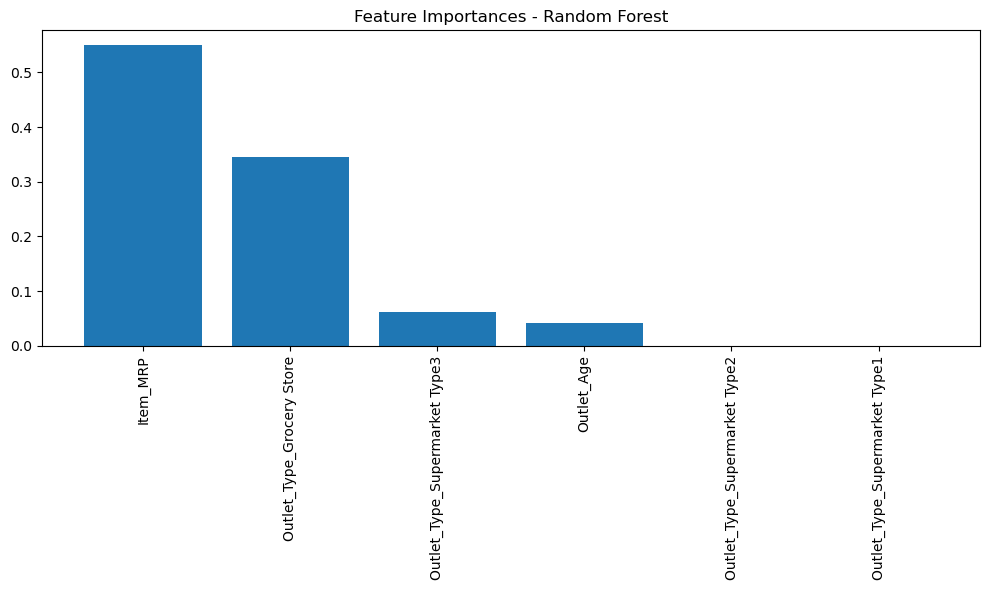

In [346]:
rf_model_final = best_rf.named_steps['model']
feat_names = numeric_feats + list(best_rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_feats))

importances = rf_model_final.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances - Random Forest')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), np.array(feat_names)[indices], rotation=90)
plt.tight_layout()
plt.show()

In [349]:
    test_df['Item_Outlet_Sales'] = best_xgb.predict(test_df[X_train.columns])

In [353]:
test_df[sample_submission_df.columns].to_csv('submission.csv',index=False)